# Load MNIST Data 

In [2]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# refer the below link for data visualization in PCA and t-SNE
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/ 

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


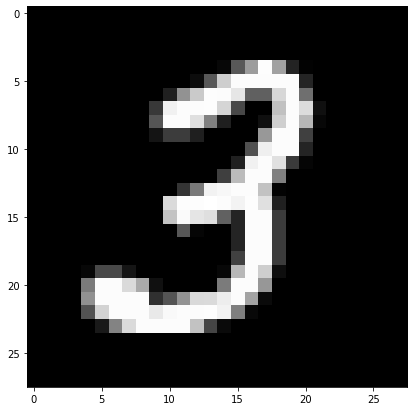

3


In [4]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 70

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

#  2D Visualization using PCA 

In [5]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [6]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [7]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of co-variance matrix = ", covar_matrix.shape)


The shape of co-variance matrix =  (784, 784)


In [8]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
print(values)

#vectors[:,0] represents the eigen vector corresponding to the 2nd eigen value.(First column in the vectors matrix)
#vectors[:,1] represents the eigen vector correspondign to the 1st eigen value.(Second column in the vectors matrix)

#Note : Eigen values are arranged in ascending order so the Eigen vectors too.


# converting the eigen vectors into (2,d) shape for ease of computation which we do it later.
vector = vectors.T

print("Updated shape of eigen vectors = ",vector.shape)
# Here, vectors[0] represent the eigen vector corresponding to the 2nd eigen value.
# Here, vectors[1] represent the eigen vector corresponding to the 1st eigen value.


#For sanity check.
print((vector[0] == vectors[:,0]).all())
print((vector[1] == vectors[:,1]).all())

#Now, we need to swap the rows of the vector matrix such that the first row corresponds to the eigen vector with the largest eigen value and the second row corresponds to the eigen vector with the second largest eigen value.

vector[[0,1]]=vector[[1,0]]

Shape of eigen vectors =  (784, 2)
[435532.55785282 605719.29173629]
Updated shape of eigen vectors =  (2, 784)
True
True


In [10]:
# projecting the original data onto the eigen basis.
# Basically, we form a matrix with the eigen vectors in row order. Then, we do a matrix-vector multiplication between the matrix we formed and all the data vectors.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vector, sample_data.T)

print (" resultant new data points' shape ", vector.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [11]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.043558      -5.558661    1.0
1      19.305278       6.193635    0.0
2      -7.678775      -1.909878    1.0
3      -0.464845       5.525748    4.0
4      26.644289       6.366527    0.0


In [12]:
import pandas as pd
df=pd.DataFrame()
df['1st']=[-5.043558,-5.558661,19.305278,6.193635]
df['2nd']=[--7.678775,-1.909878,-0.464845,5.525748]
df['label']=[1,0,1,4]

C:\Users\rajus\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


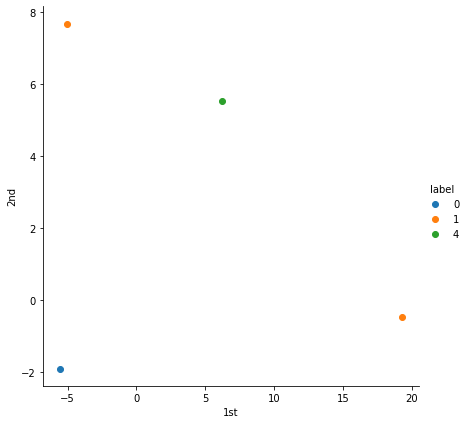

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(df, hue="label", size=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

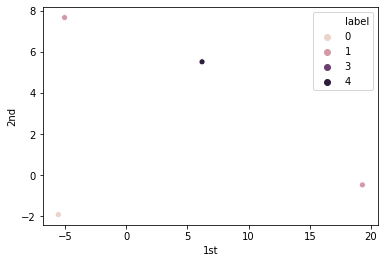

In [12]:
sn.scatterplot(x="1st",y="2nd",hue="label",data=df)

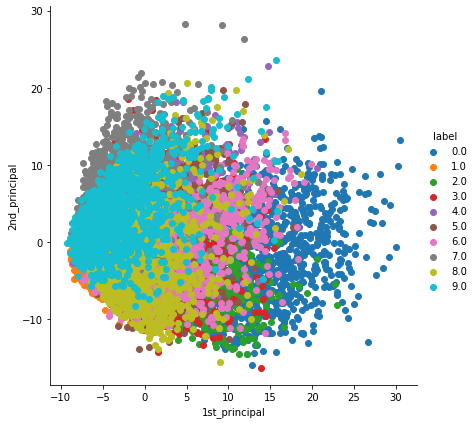

In [14]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

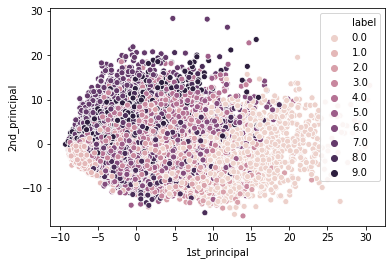

In [14]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

# PCA using Scikit-Learn

In [15]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [16]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (15000, 2)


C:\Users\rajus\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


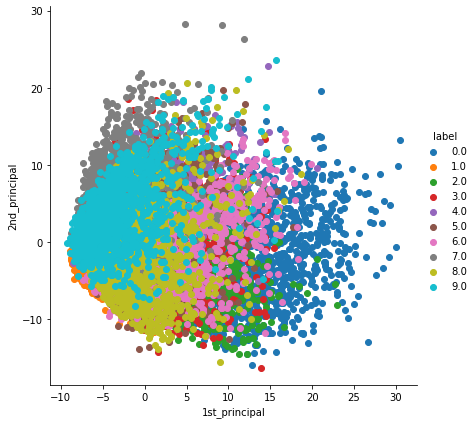

In [17]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

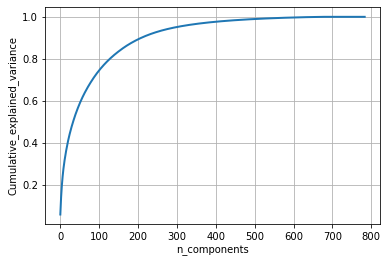

In [18]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

# explained_variance_ = (lambda)_i
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Scikit-Learn

C:\Users\rajus\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


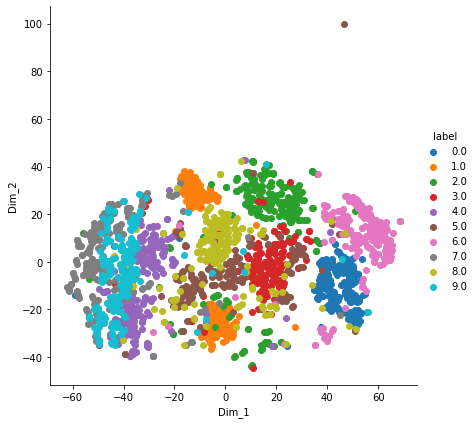

In [23]:
# TSNE
# refer the below for studying more about t-SNE
# https://distill.pub/2016/misread-tsne/

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:2000,:]
labels_1000 = labels[0:2000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Users\rajus\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


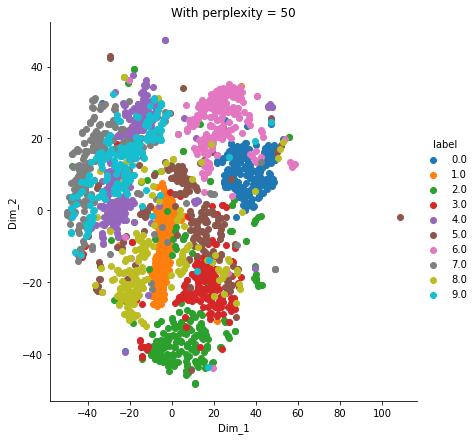

In [24]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

D:\Installed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


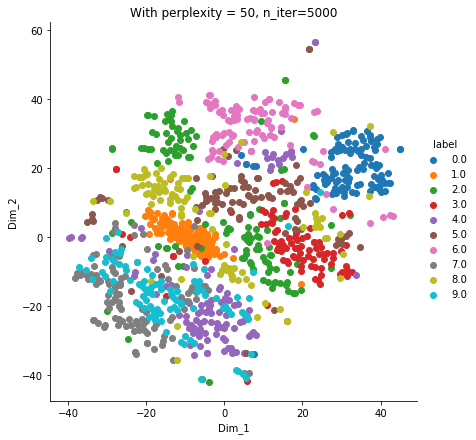

In [21]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

D:\Installed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


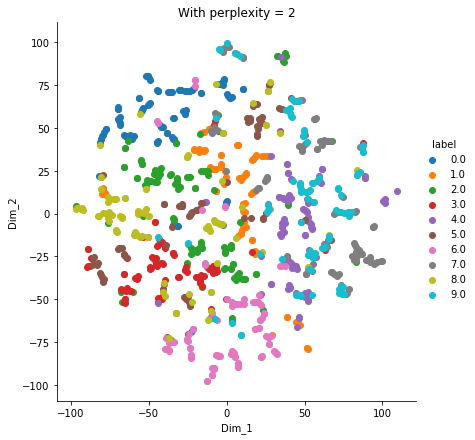

In [22]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [23]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/